## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
X=dataset.iloc[:, 1:-1].values
y=dataset.iloc[:, -1].values

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=1)
regressor.fit(X, y)
y_pred=regressor.predict(X)
y_pred

array([ 50050.,  51700.,  59050.,  78350., 103600., 143700., 193300.,
       283500., 513000., 818000.])

In [9]:
from sklearn.metrics import r2_score
print("Score:", r2_score(y, y_pred))

Score: 0.9581925776927869


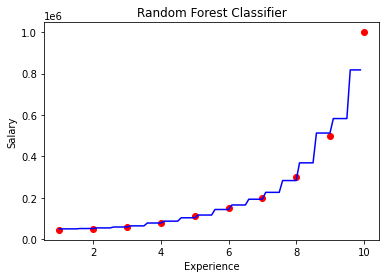

In [10]:
X_grid=np.arange(min(X), max(X), 0.1).reshape(-1, 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Random Forest Classifier")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()